## Data Preprocess

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split



In [4]:
fire = pd.read_csv('E:\Sem 8 (Fall 2022)\CSE474\~Project_Resources\Code\dataset.csv')
fire['IG_DATE'] = pd.to_datetime(fire['IG_DATE'])
fire.shape

(29533, 25)

In [5]:
fire.head()

,X,Y,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,...,GREENNESS_THRESHOLD,IG_DATE,ACRES,IRWINID,MAP_ID,MAP_PROG,PERIM_ID,DNBR_OFFST,DNBR_STDDV,COMMENTS
0,-117.637839,33.710768,347841,CA3370911761819840126,Extended (SS),NaN,504003719840623,9999,150,-70,...,9999,1984-01-26 00:00:00+00:00,1266,NaN,10005362,MTBS,504003719840323,-9999,-9999,NaN
1,-94.655528,36.981695,347842,OK3698209465619840221,Initial (SS),NaN,502603419840418,9999,-50,-147,...,9999,1984-02-21 00:00:00+00:00,1048,NaN,4539,MTBS,NaN,-9999,-9999,NaN
2,-98.406773,30.374134,347843,TX3028409841719840226,Initial (SS),NaN,502703919840409,9999,100,-9999,...,9999,1984-02-26 00:00:00+00:00,3696,NaN,10003829,MTBS,NaN,-9999,-9999,NaN
3,-120.187609,36.073892,347844,CA3607412018819840329,Initial (SS),NaN,504203519840707,9999,-65,-280,...,9999,1984-03-29 00:00:00+00:00,1462,NaN,4557,MTBS,NaN,-9999,-9999,Single scene assessment
4,-102.751647,36.366836,347845,TX3635010276719840329,Initial (SS),NaN,503103519840608,9999,200,-9999,...,9999,1984-03-29 00:00:00+00:00,1110,NaN,10003855,MTBS,NaN,-9999,-9999,NaN


In [6]:
fire.info()
print(fire.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29533 entries, 0 to 29532
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   X                    29533 non-null  float64            
 1   Y                    29533 non-null  float64            
 2   OBJECTID             29533 non-null  int64              
 3   FIRE_ID              29533 non-null  object             
 4   ASMNT_TYPE           29533 non-null  object             
 5   PRE_ID               20349 non-null  object             
 6   POST_ID              29533 non-null  object             
 7   NODATA_THRESHOLD     29533 non-null  int64              
 8   LOW_THRESHOLD        29533 non-null  int64              
 9   MODERATE_THRESHOLD   29533 non-null  int64              
 10  HIGH_THRESHOLD       29533 non-null  int64              
 11  LATITUDE             29533 non-null  float64            
 12  LONGITUDE         

In [7]:
# Dropping unnecessary columns
fire.drop(columns = ["COMMENTS"], axis = 1, inplace = True)
fire.shape

(29533, 24)

In [8]:
# ID columns to drop
drop_store = ['OBJECTID','FIRE_ID']

# Drop ID columns in test and save it for future prediction
Test_ID = fire['OBJECTID'].tolist() #used to convert the data elements of an array into a list.
Test_ID_2 = fire['FIRE_ID'].tolist() #used to convert the data elements of an array into a list.
fire.drop(columns = drop_store, axis = 1, inplace = True)

fire.shape

(29533, 22)

<AxesSubplot: >

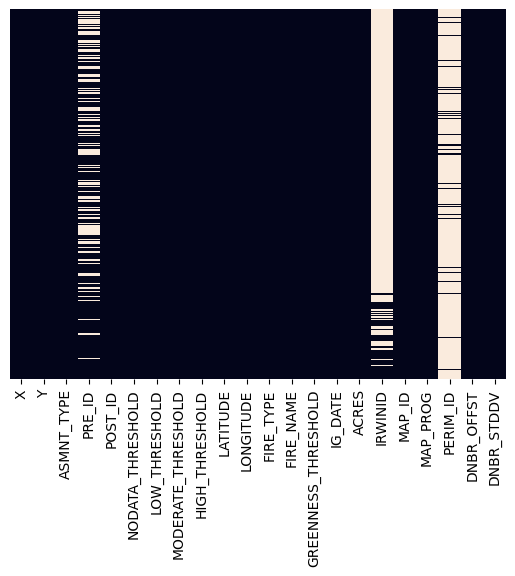

In [9]:
sns.heatmap(fire.isnull(),yticklabels=False,cbar=False)

In [10]:
fire['PRE_ID'] = fire['PRE_ID'].fillna(fire['PRE_ID'].mode()[0])
fire['IRWINID'] = fire['IRWINID'].fillna(fire['IRWINID'].mode()[0])
fire['PERIM_ID'] = fire['PERIM_ID'].fillna(fire['PERIM_ID'].mode()[0])
# Will try KNN

In [11]:
fire.isnull().sum()

X                      0
Y                      0
ASMNT_TYPE             0
PRE_ID                 0
POST_ID                0
NODATA_THRESHOLD       0
LOW_THRESHOLD          0
MODERATE_THRESHOLD     0
HIGH_THRESHOLD         0
LATITUDE               0
LONGITUDE              0
FIRE_TYPE              0
FIRE_NAME              0
GREENNESS_THRESHOLD    0
IG_DATE                0
ACRES                  0
IRWINID                0
MAP_ID                 0
MAP_PROG               0
PERIM_ID               0
DNBR_OFFST             0
DNBR_STDDV             0
dtype: int64

<AxesSubplot: >

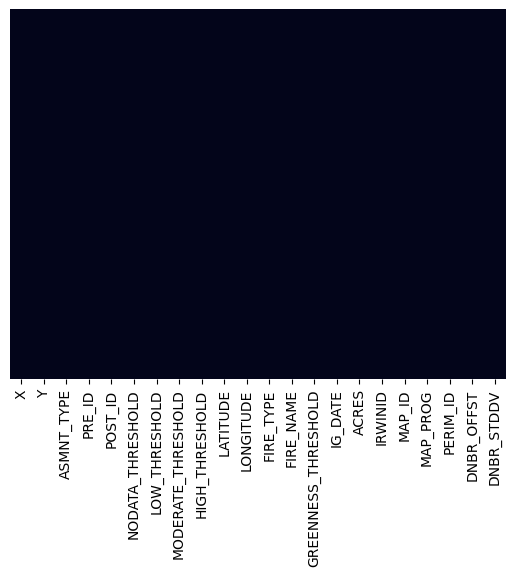

In [12]:
# Let's visualize the null value again
sns.heatmap(fire.isnull(),yticklabels=False,cbar=False)

<AxesSubplot: >

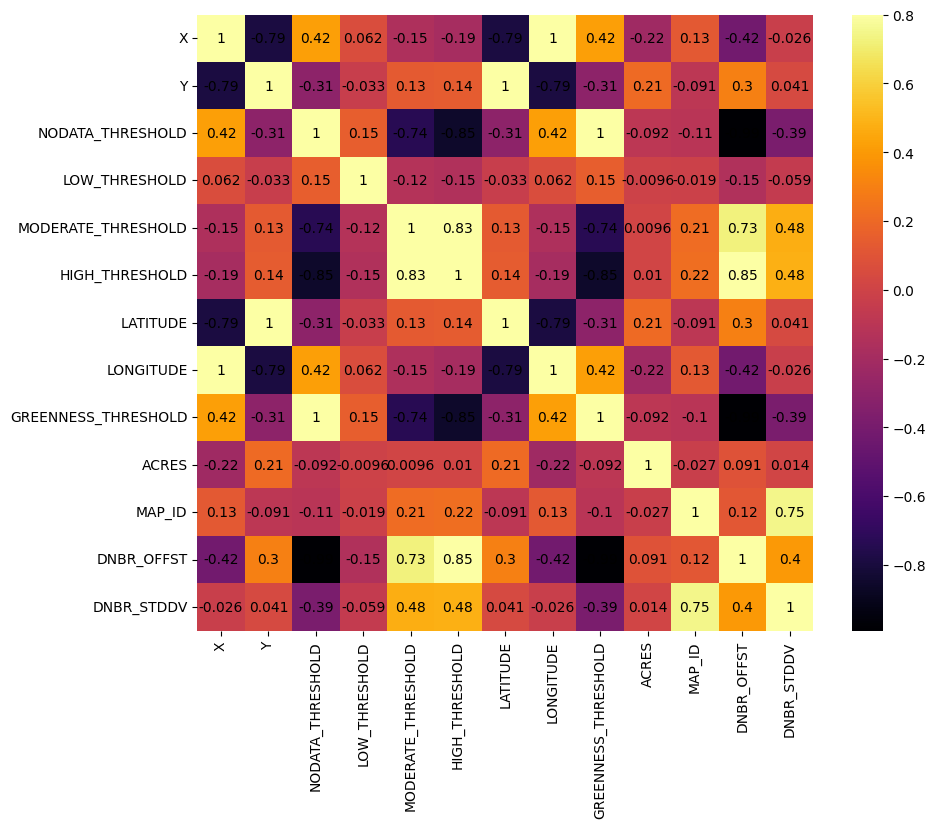

In [13]:
corr = fire.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax = .8, square = True, annot_kws = {"size": 10, "color": "black"}, cmap = 'inferno', annot = True)

In [14]:
fire.describe()

,X,Y,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,LONGITUDE,GREENNESS_THRESHOLD,ACRES,MAP_ID,DNBR_OFFST,DNBR_STDDV
count,29533.000000,29533.000000,29533.000000,29533.000000,29533.000000,29533.000000,29533.000000,29533.000000,29533.000000,2.953300e+04,2.953300e+04,29533.000000,29533.000000
mean,-100.969463,37.354464,2461.505807,13.947516,-76.532828,943.094335,37.354393,-100.969011,3023.249280,6.962795e+03,3.034354e+06,-3089.105780,-7354.202214
std,17.822558,8.308088,5085.844792,1155.174561,6576.667457,8048.324642,8.308229,17.822535,4706.843424,2.526941e+04,4.590759e+06,4622.880005,4416.357171
min,-166.091133,17.956564,-1500.000000,-9999.000000,-9999.000000,-9999.000000,17.957000,-166.067000,-650.000000,5.000000e+02,4.140000e+02,-9999.000000,-9999.000000
25%,-113.940478,31.148959,-970.000000,45.000000,-139.000000,-9999.000000,31.148000,-113.939000,-150.000000,1.171000e+03,9.457000e+03,-9999.000000,-9999.000000
50%,-96.547644,35.913414,-970.000000,75.000000,275.000000,550.000000,35.912000,-96.548000,-150.000000,1.938000e+03,1.720200e+04,-16.000000,-9999.000000
75%,-84.959044,41.186640,9999.000000,170.000000,392.000000,9999.000000,41.187000,-84.959000,9999.000000,4.239000e+03,1.000220e+07,16.000000,0.000000
max,-65.350627,70.139257,9999.000000,9999.000000,9999.000000,9999.000000,70.139000,-65.350000,9999.000000,1.068802e+06,1.002213e+07,373.000000,95.000000


In [15]:
fire.dtypes

X                                  float64
Y                                  float64
ASMNT_TYPE                          object
PRE_ID                              object
POST_ID                             object
NODATA_THRESHOLD                     int64
LOW_THRESHOLD                        int64
MODERATE_THRESHOLD                   int64
HIGH_THRESHOLD                       int64
LATITUDE                           float64
LONGITUDE                          float64
FIRE_TYPE                           object
FIRE_NAME                           object
GREENNESS_THRESHOLD                  int64
IG_DATE                datetime64[ns, UTC]
ACRES                                int64
IRWINID                             object
MAP_ID                               int64
MAP_PROG                            object
PERIM_ID                            object
DNBR_OFFST                           int64
DNBR_STDDV                           int64
dtype: object

## Numeric
#### Correlation with Area

In [16]:
# Initial Correlation
(fire.corr()**2)["ACRES"].sort_values(ascending = False)[:28]

ACRES                  1.000000
X                      0.049846
LONGITUDE              0.049837
Y                      0.043143
LATITUDE               0.043140
NODATA_THRESHOLD       0.008479
GREENNESS_THRESHOLD    0.008470
DNBR_OFFST             0.008335
MAP_ID                 0.000709
DNBR_STDDV             0.000199
HIGH_THRESHOLD         0.000101
LOW_THRESHOLD          0.000093
MODERATE_THRESHOLD     0.000092
Name: ACRES, dtype: float64

In [17]:
(fire.corr())["ACRES"].sort_values(ascending = False)[:28]

ACRES                  1.000000
Y                      0.207709
LATITUDE               0.207701
DNBR_OFFST             0.091296
DNBR_STDDV             0.014116
HIGH_THRESHOLD         0.010059
MODERATE_THRESHOLD     0.009615
LOW_THRESHOLD         -0.009624
MAP_ID                -0.026630
GREENNESS_THRESHOLD   -0.092030
NODATA_THRESHOLD      -0.092082
LONGITUDE             -0.223241
X                     -0.223262
Name: ACRES, dtype: float64

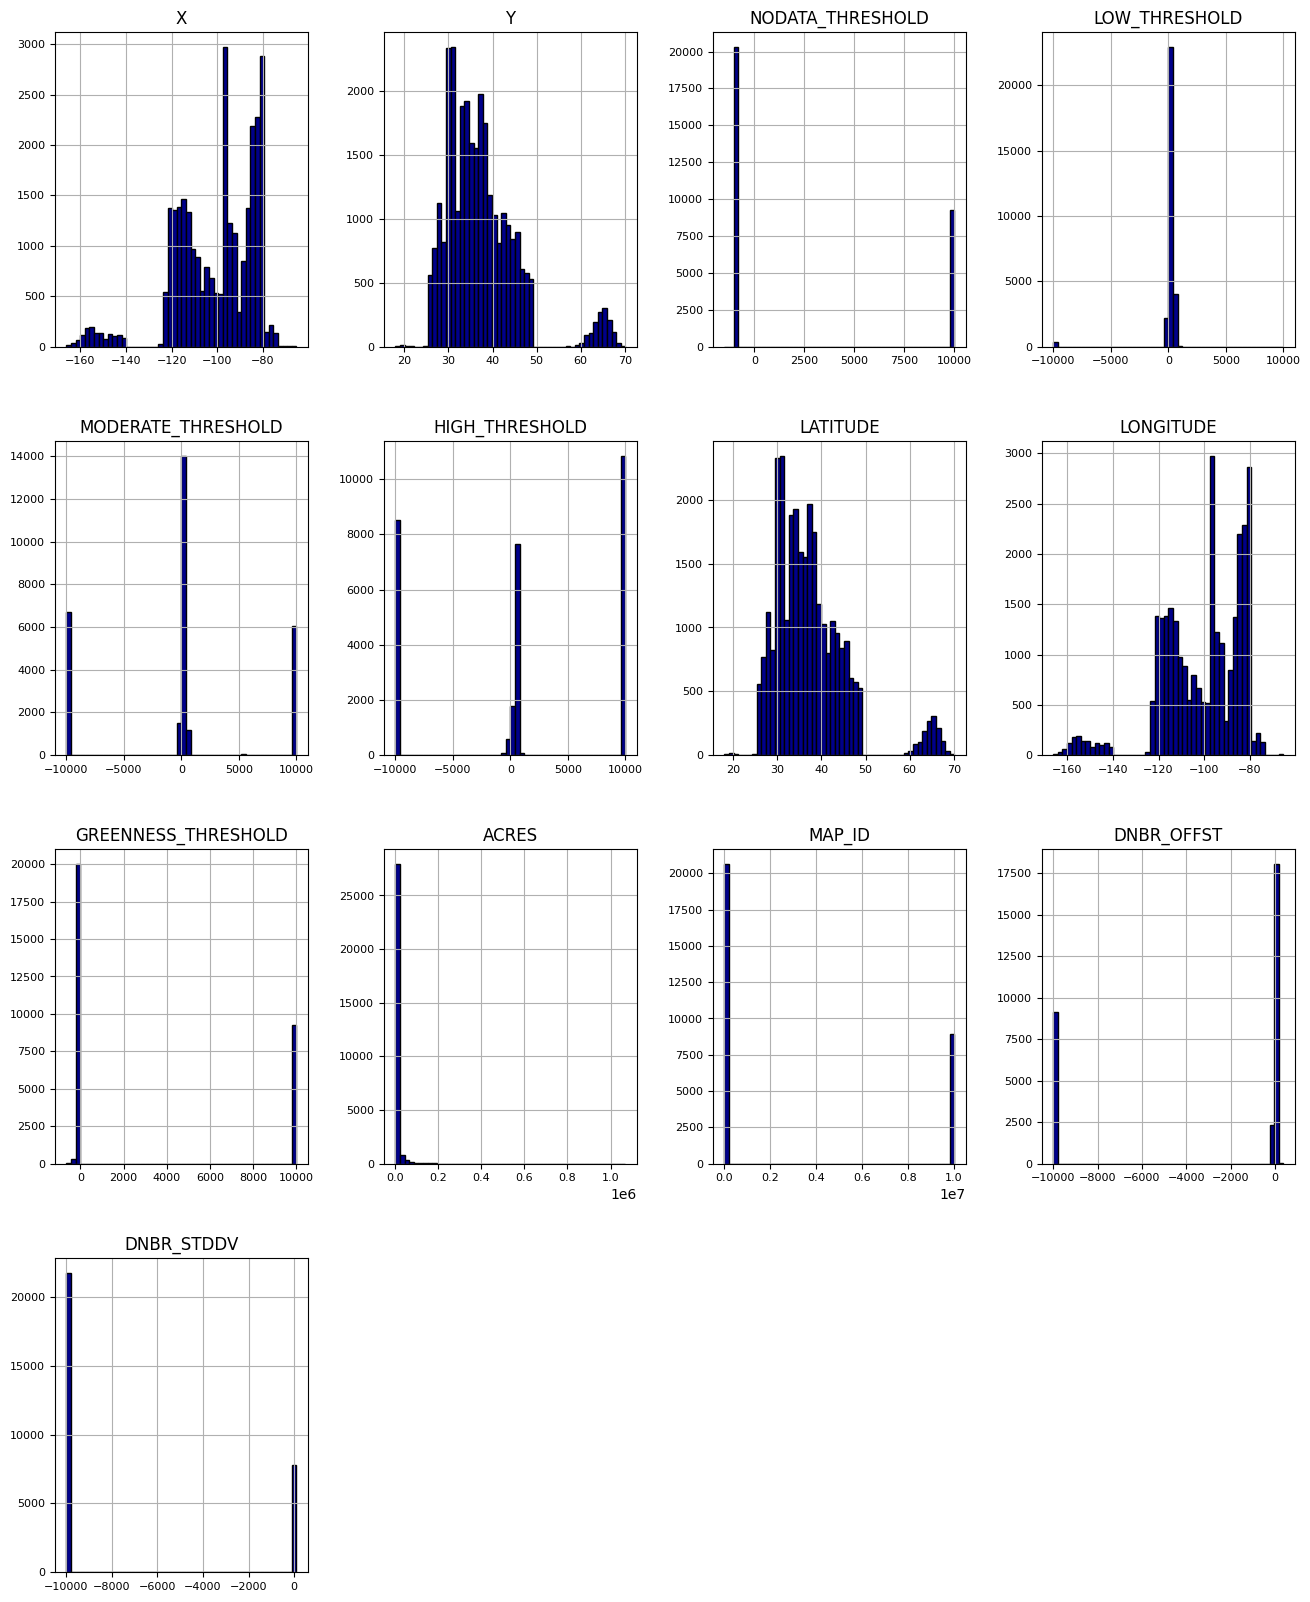

In [18]:
# Plot the distribution of all the numerical features
fire_num = fire.select_dtypes(include = [np.number]) 
fig_ = fire_num.hist(figsize = (16, 20), bins = 50, color = "darkblue",
                           edgecolor = "black", xlabelsize = 8, ylabelsize = 8)

In [19]:
# Initial Correlation
# (fire.corr())["ACRES"].sort_values(ascending = False)[:28]

In [20]:
fire_numeric = [col for col in fire.columns if fire[col].dtypes != 'object']
print("Numeric Features:", fire_numeric)
print(f"\nTotal Numeric Features: {len(fire_numeric)}")

Numeric Features: ['X', 'Y', 'NODATA_THRESHOLD', 'LOW_THRESHOLD', 'MODERATE_THRESHOLD', 'HIGH_THRESHOLD', 'LATITUDE', 'LONGITUDE', 'GREENNESS_THRESHOLD', 'IG_DATE', 'ACRES', 'MAP_ID', 'DNBR_OFFST', 'DNBR_STDDV']

Total Numeric Features: 14


In [21]:
(fire_num.corr()**2)["ACRES"].sort_values(ascending = False)[:28]

ACRES                  1.000000
X                      0.049846
LONGITUDE              0.049837
Y                      0.043143
LATITUDE               0.043140
NODATA_THRESHOLD       0.008479
GREENNESS_THRESHOLD    0.008470
DNBR_OFFST             0.008335
MAP_ID                 0.000709
DNBR_STDDV             0.000199
HIGH_THRESHOLD         0.000101
LOW_THRESHOLD          0.000093
MODERATE_THRESHOLD     0.000092
Name: ACRES, dtype: float64

<AxesSubplot: >

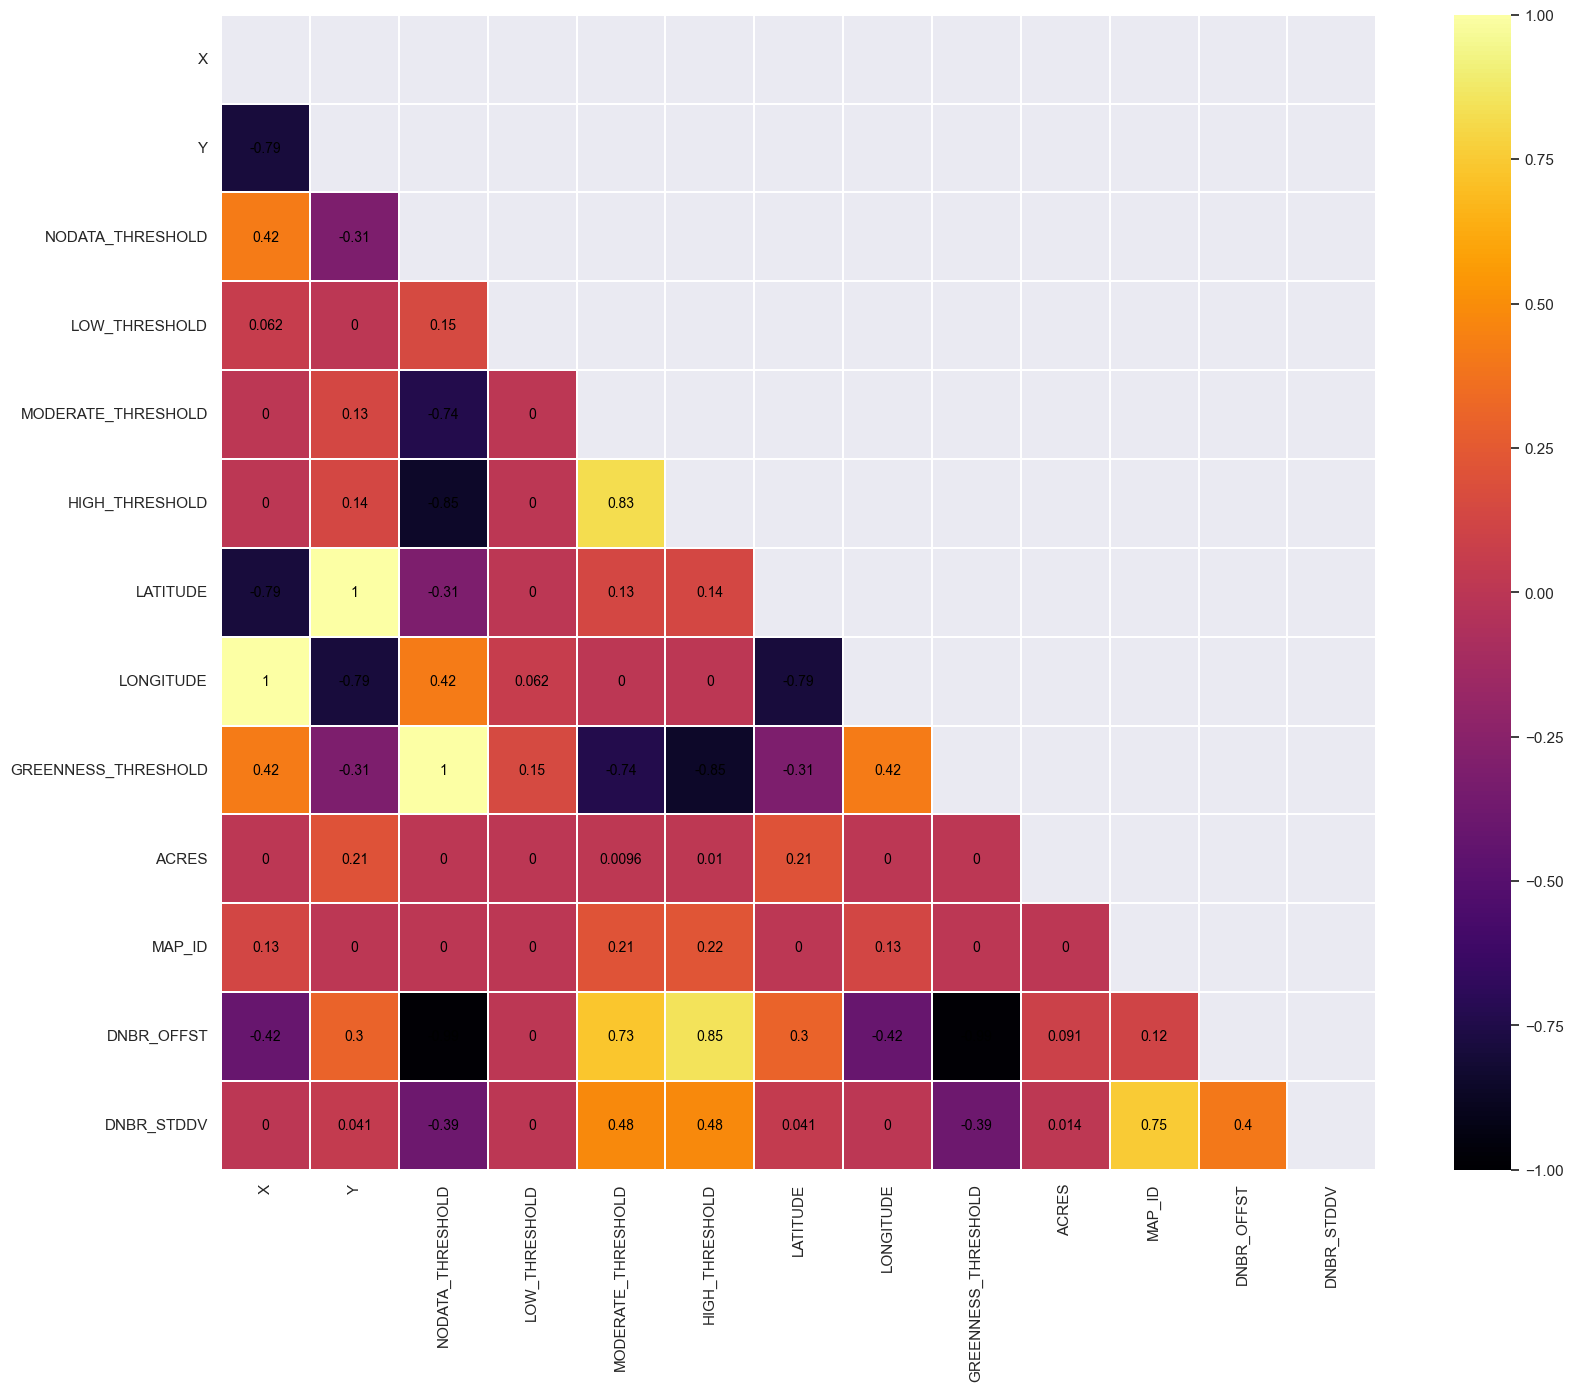

In [22]:
# Heatmap for remaining numerical data
# For now, will neglect the low correlation varible with "ACRES" as those will not have a huge impact on the final result. So, replacing those values with 0s.


corr_matrix = fire_num.corr()
corr_matrix[(corr_matrix < 0) & (corr_matrix > -0.3)] = 0


# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

cmap = "inferno"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, mask = mask, vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True, cmap = cmap, annot = True)

## Checking high and poor correlation

In [23]:
(fire_num.corr()**2)["ACRES"].sort_values(ascending = False) # Leaving out ACRES

ACRES                 1.00
X                     0.05
LONGITUDE             0.05
Y                     0.04
LATITUDE              0.04
NODATA_THRESHOLD      0.01
GREENNESS_THRESHOLD   0.01
DNBR_OFFST            0.01
MAP_ID                0.00
DNBR_STDDV            0.00
HIGH_THRESHOLD        0.00
LOW_THRESHOLD         0.00
MODERATE_THRESHOLD    0.00
Name: ACRES, dtype: float64

In [24]:
corr_data_with_ACRES = (fire_num.corr()**2)["ACRES"] # Leaving out ACRES

high_corr_list = (corr_data_with_ACRES[abs(corr_data_with_ACRES) >= 0.01].sort_values(ascending = False).round(2))
low_corr_list = (corr_data_with_ACRES[(abs(corr_data_with_ACRES) < 0.01)].sort_values(ascending = False).round(2))


print(f"{len(high_corr_list)} high correlated values with ACRES:\n{high_corr_list}\n")
print(f"{len(low_corr_list)} low correlated values with ACRES:\n{low_corr_list}\n")

# ACRES                  1.00
# Y                      0.21
# LATITUDE               0.21
# DNBR_OFFST             0.09
# DNBR_STDDV             0.01
# HIGH_THRESHOLD         0.01
# MODERATE_THRESHOLD     0.01
# LOW_THRESHOLD         -0.01
# MAP_ID                -0.03
# GREENNESS_THRESHOLD   -0.09
# NODATA_THRESHOLD      -0.09
# LONGITUDE             -0.22
# X                     -0.22

5 high correlated values with ACRES:
ACRES       1.00
X           0.05
LONGITUDE   0.05
Y           0.04
LATITUDE    0.04
Name: ACRES, dtype: float64

8 low correlated values with ACRES:
NODATA_THRESHOLD      0.01
GREENNESS_THRESHOLD   0.01
DNBR_OFFST            0.01
MAP_ID                0.00
DNBR_STDDV            0.00
HIGH_THRESHOLD        0.00
LOW_THRESHOLD         0.00
MODERATE_THRESHOLD    0.00
Name: ACRES, dtype: float64



In [25]:
corr_data = (fire_num.corr())["ACRES"].sort_values(ascending = False)
corr_data

ACRES                  1.00
Y                      0.21
LATITUDE               0.21
DNBR_OFFST             0.09
DNBR_STDDV             0.01
HIGH_THRESHOLD         0.01
MODERATE_THRESHOLD     0.01
LOW_THRESHOLD         -0.01
MAP_ID                -0.03
GREENNESS_THRESHOLD   -0.09
NODATA_THRESHOLD      -0.09
LONGITUDE             -0.22
X                     -0.22
Name: ACRES, dtype: float64

## Categorical Values

In [26]:
fire_catagoric = [col for col in fire.columns if fire[col].dtypes == 'object']
print(f"Categorical Features:\n{fire_catagoric}")
print(f"\nTotal Categirical Features: {len(fire_catagoric)}")

Categorical Features:
['ASMNT_TYPE', 'PRE_ID', 'POST_ID', 'FIRE_TYPE', 'FIRE_NAME', 'IRWINID', 'MAP_PROG', 'PERIM_ID']

Total Categirical Features: 8


In [27]:
print("Number of records: {}".format(len(fire)))


print("Number of \n PRE_ID: {}, POST_ID: {}, FIRE_NAME: {}, IRWINID: {}, PERIM_ID: {}\n".format(len(fire['PRE_ID'].unique()), len(fire['POST_ID'].unique()), 
                                                            len(fire['FIRE_NAME'].unique()), len(fire['IRWINID'].unique()), len(fire['PERIM_ID'].unique())))


print("______________________________________________________________________________")
print("Number of ASMNT_TYPE: {}".format(len(fire['ASMNT_TYPE'].unique())))
print(fire['ASMNT_TYPE'].unique(), '\n')

print("Number of FIRE_TYPE: {}".format(len(fire['FIRE_TYPE'].unique())))
print(fire['FIRE_TYPE'].unique(), '\n')

print("Number of MAP_PROG: {}".format(len(fire['MAP_PROG'].unique())))
print(fire['MAP_PROG'].unique(), '\n')


Number of records: 29533
Number of 
 PRE_ID: 9731, POST_ID: 13178, FIRE_NAME: 14504, IRWINID: 3795, PERIM_ID: 1909

______________________________________________________________________________
Number of ASMNT_TYPE: 4
['Extended (SS)' 'Initial (SS)' 'Initial' 'Extended'] 

Number of FIRE_TYPE: 4
['Wildfire' 'Prescribed Fire' 'Unknown' 'Wildland Fire Use'] 

Number of MAP_PROG: 1
['MTBS'] 



## How each feature affect the area of fire

Features we are focusing on are,<br>
ASMNT_TYPE with 4 unique variable ['Extended (SS)' 'Initial (SS)' 'Initial' 'Extended'] <br>
FIRE_TYPE with 4 unique variable ['Wildfire' 'Prescribed Fire' 'Unknown' 'Wildland Fire Use'] <br>
MAP_PROG with 1 unique variable ['MTBS'] 

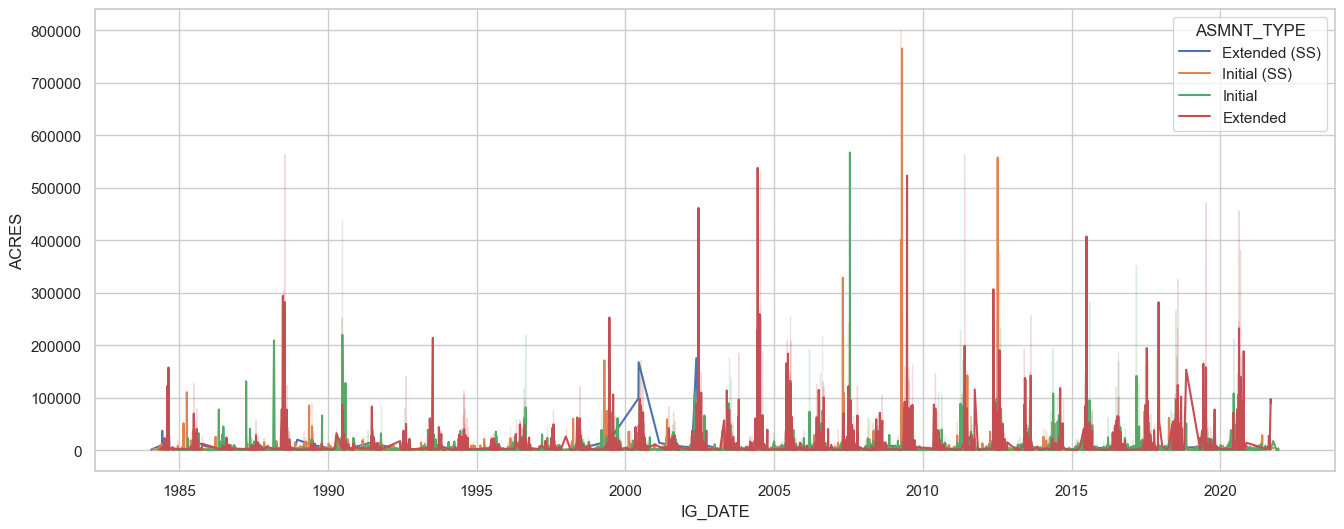

In [28]:
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
g = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'ASMNT_TYPE', data = fire)

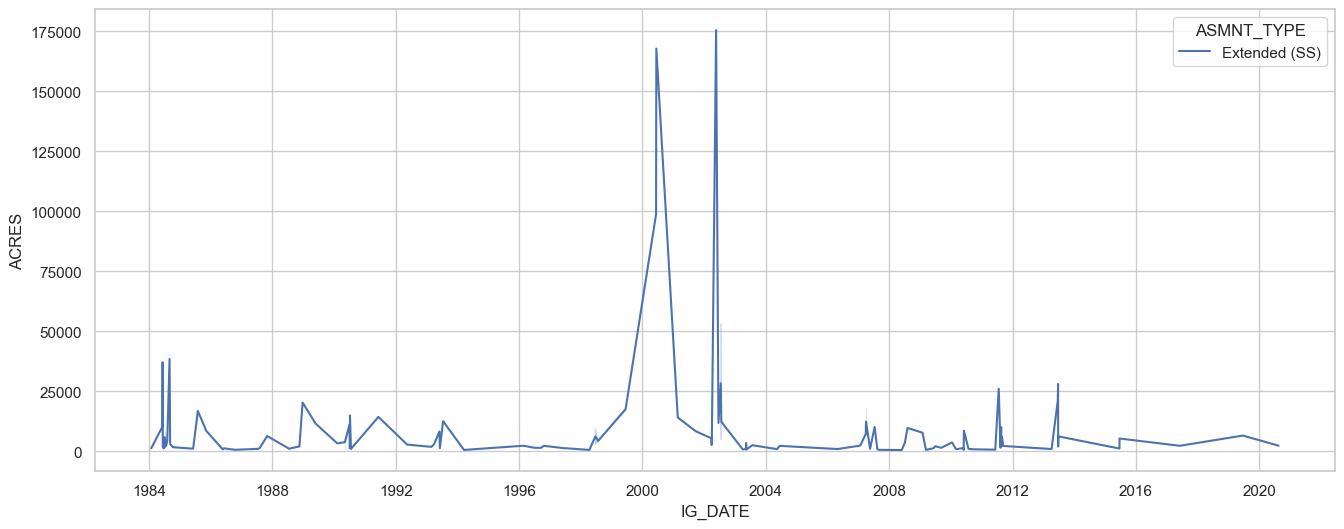

In [29]:
# 1
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
g1 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'ASMNT_TYPE', data = fire[fire['ASMNT_TYPE']=='Extended (SS)'])
# g1.set_yscale("log")

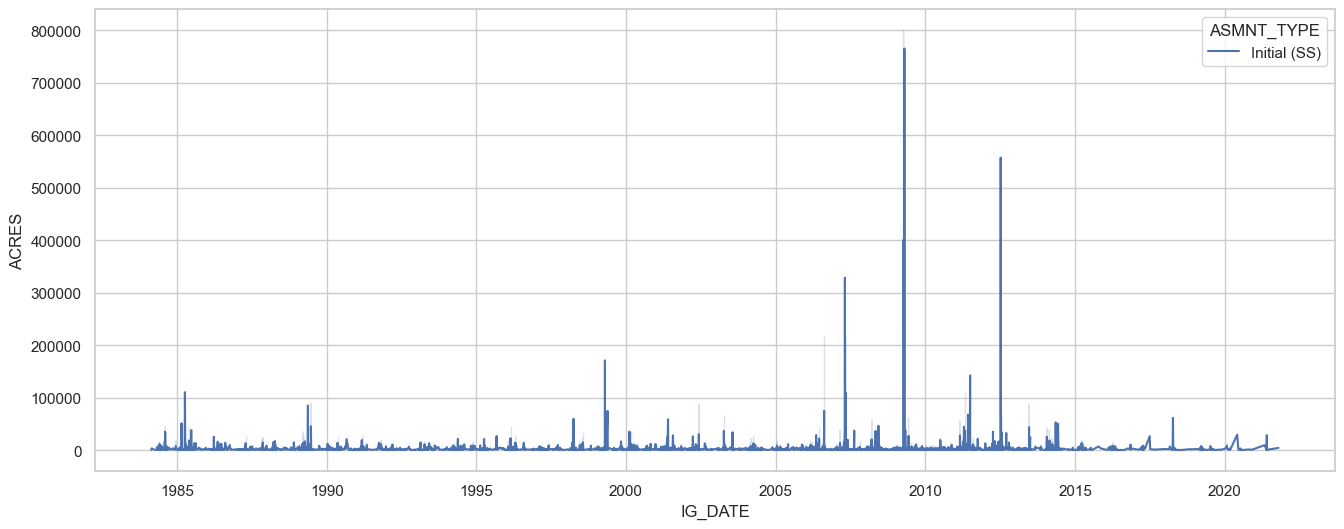

In [30]:
# 2
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
g2 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'ASMNT_TYPE', data = fire[fire['ASMNT_TYPE']=='Initial (SS)'])
# g.set_yscale("log")

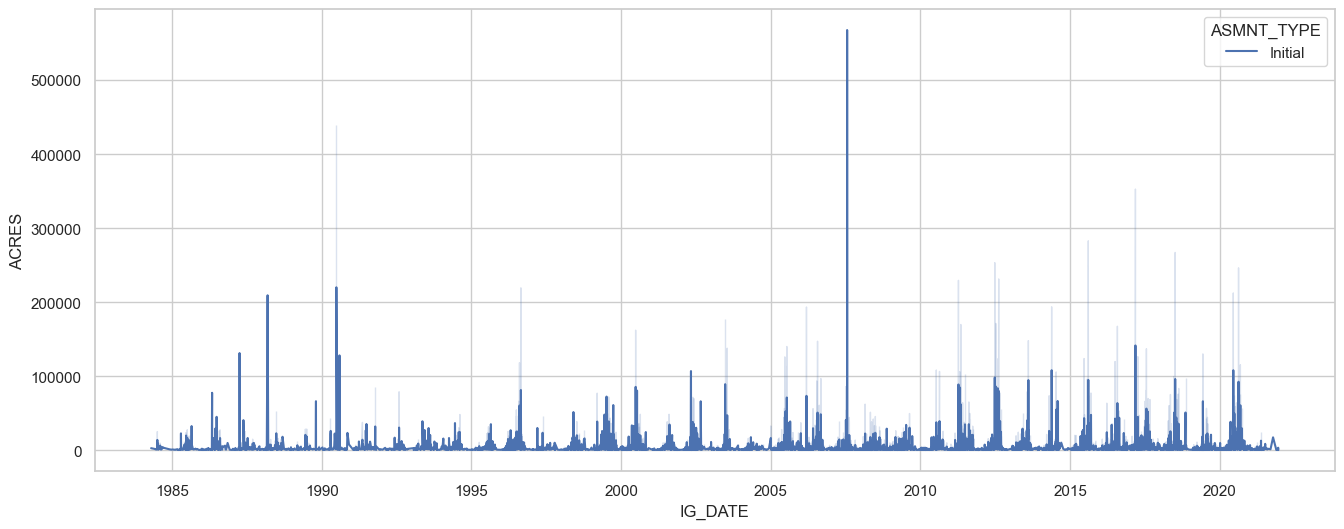

In [31]:
# 3
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
g3 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'ASMNT_TYPE', data = fire[fire['ASMNT_TYPE']=='Initial'])
# g.set_yscale("log")

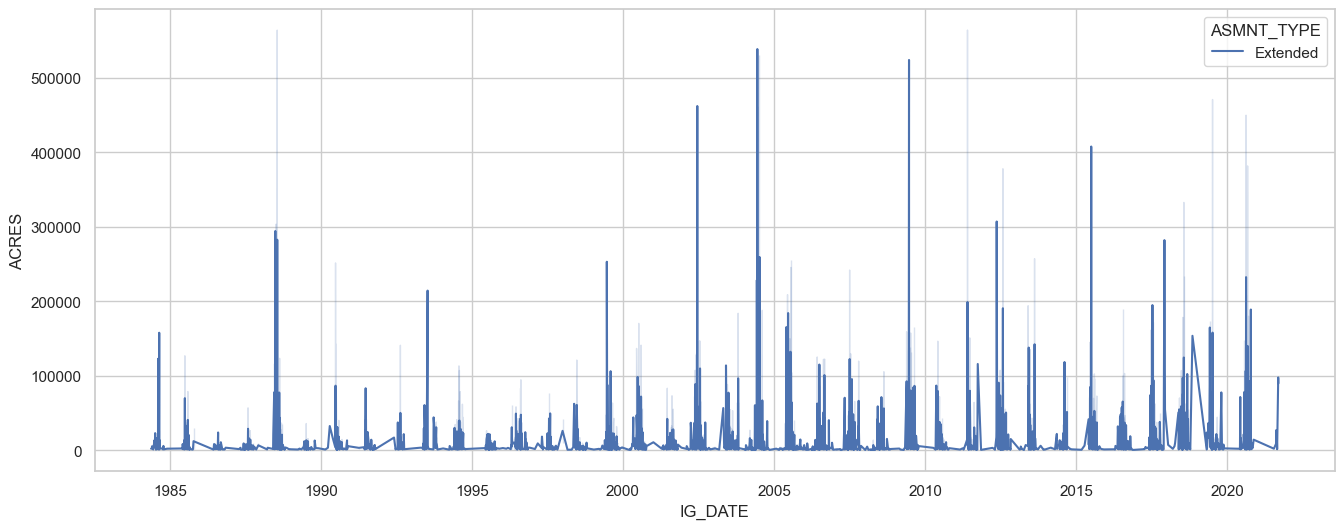

In [32]:
# 4
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
g4 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'ASMNT_TYPE', data = fire[fire['ASMNT_TYPE']=='Extended'])
# g.set_yscale("log")

#### FIRE_TYPE


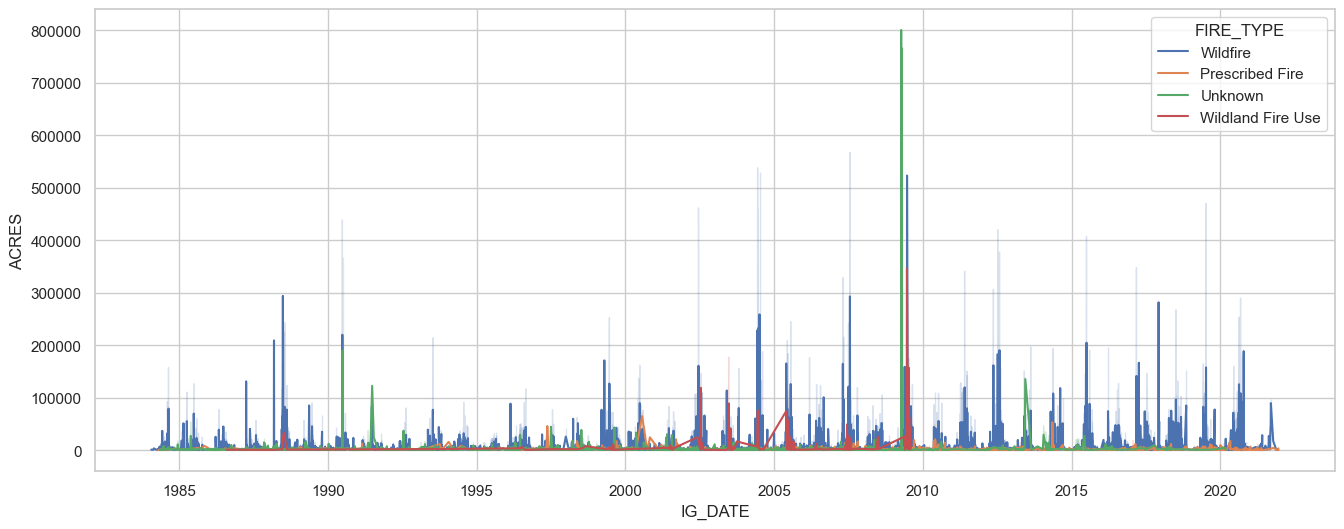

In [33]:
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
f_g = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'FIRE_TYPE', data = fire)

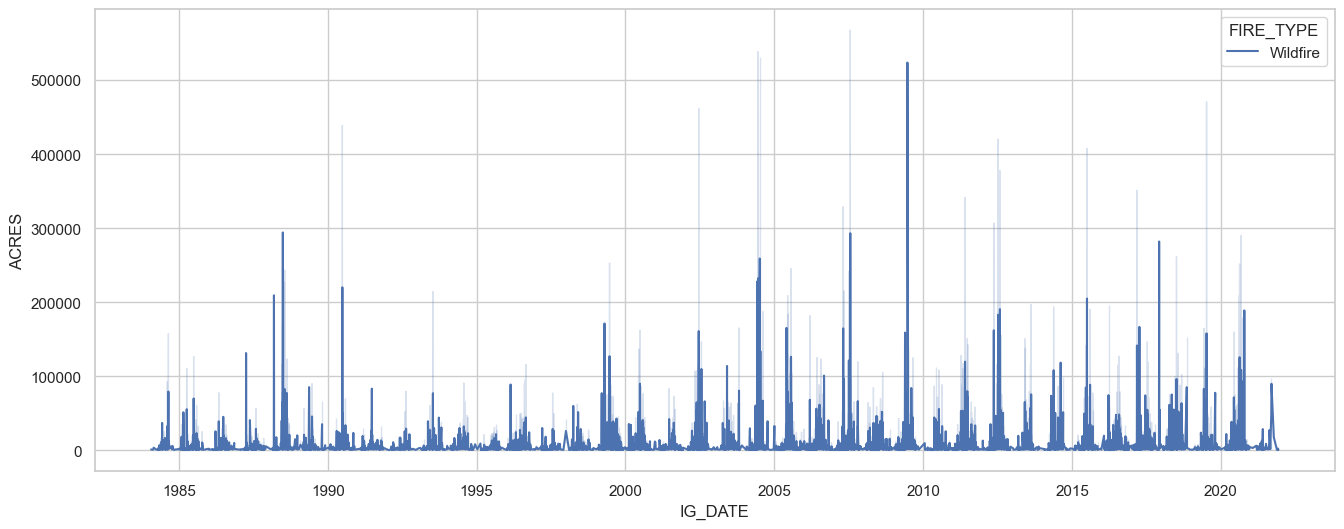

In [34]:
# 1
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
f_g1 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'FIRE_TYPE', data = fire[fire['FIRE_TYPE']=='Wildfire'])
# g.set_yscale("log")

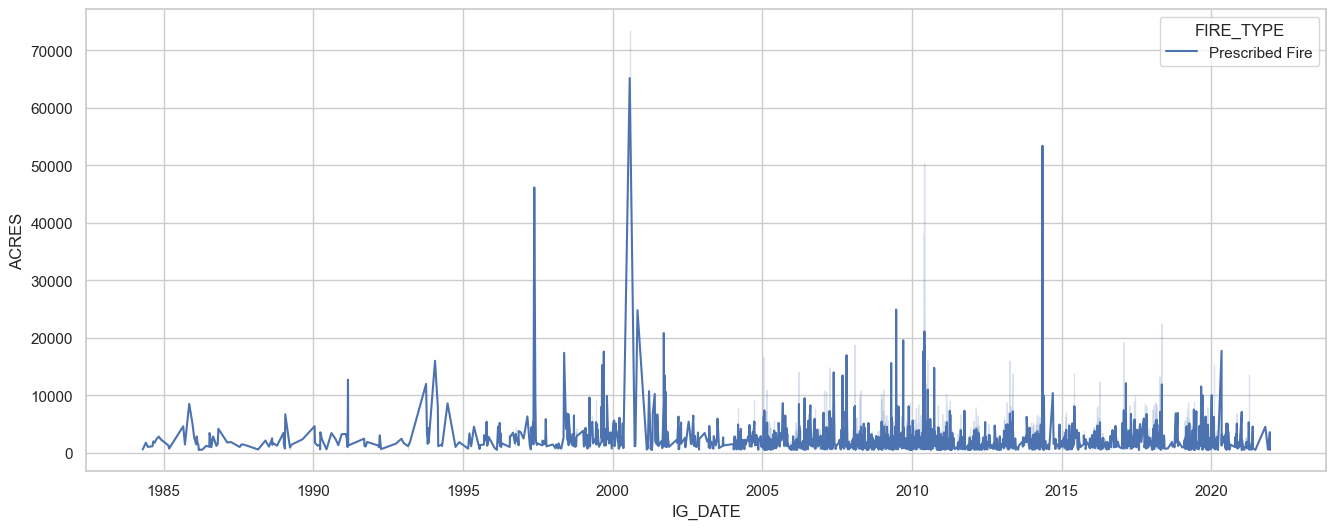

In [35]:
# 2
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
f_g2 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'FIRE_TYPE', data = fire[fire['FIRE_TYPE']=='Prescribed Fire'])

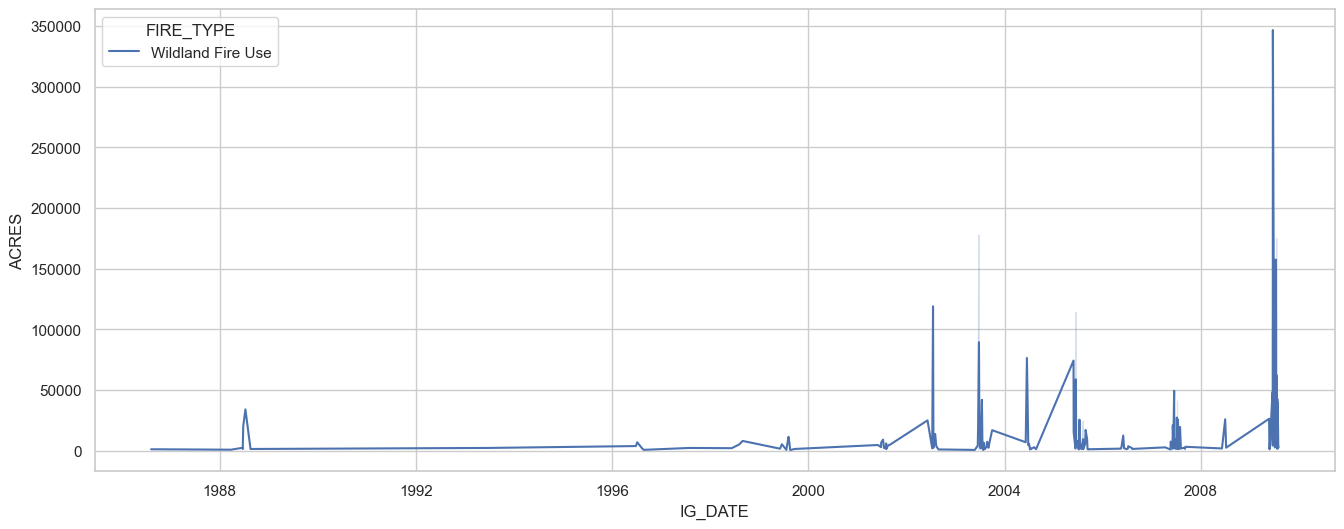

In [36]:
# 3
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
f_g3 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'FIRE_TYPE', data = fire[fire['FIRE_TYPE']=='Wildland Fire Use'])

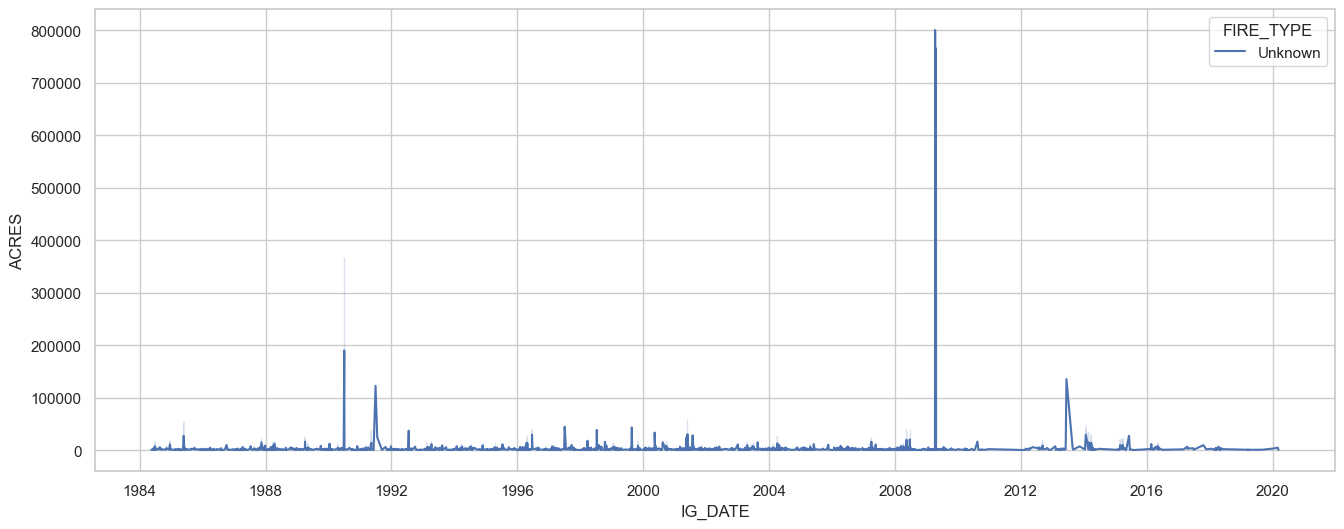

In [37]:
# 4
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
f_g4 = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'FIRE_TYPE', data = fire[fire['FIRE_TYPE']=='Unknown'])

#### MAP_PROG

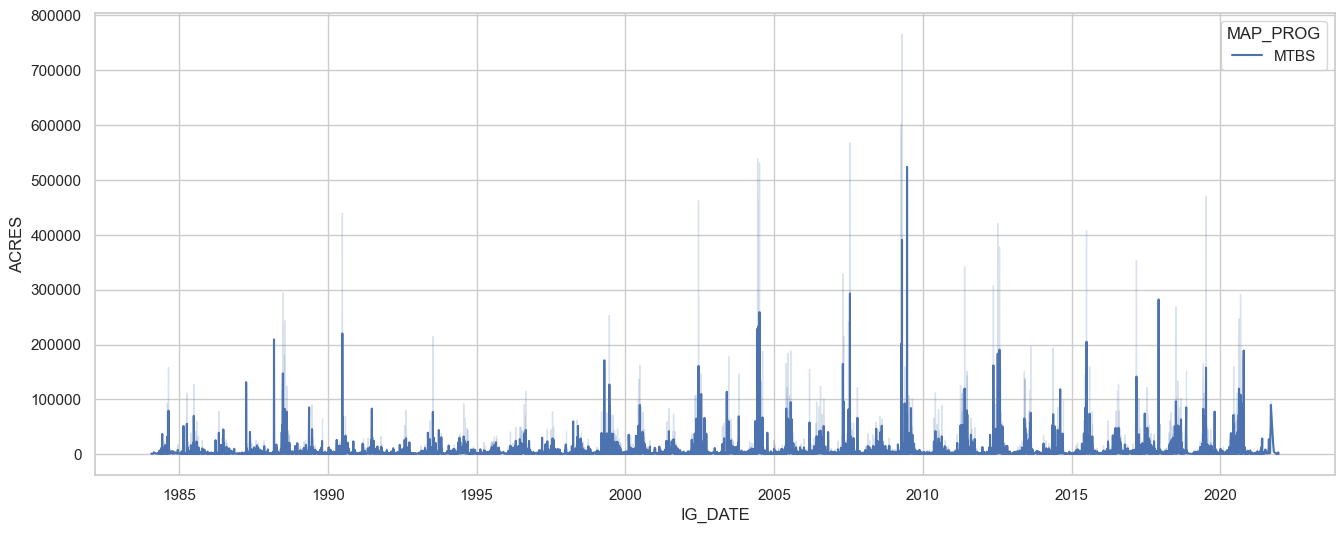

In [38]:
plt.figure(figsize = (16, 6))
sns.set(style = "whitegrid")
m_g = sns.lineplot(x = "IG_DATE", y = "ACRES", hue = 'MAP_PROG', data = fire)

In [41]:
fire_catagoric = pd.concat([fire[fire_catagoric], fire['ACRES']], axis = 1)

In [42]:
fire_catagoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29533 entries, 0 to 29532
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ASMNT_TYPE  29533 non-null  object
 1   PRE_ID      29533 non-null  object
 2   POST_ID     29533 non-null  object
 3   FIRE_TYPE   29533 non-null  object
 4   FIRE_NAME   29533 non-null  object
 5   IRWINID     29533 non-null  object
 6   MAP_PROG    29533 non-null  object
 7   PERIM_ID    29533 non-null  object
 8   ACRES       29533 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.0+ MB


In [43]:
print(f"Categorical Train: {fire_catagoric.shape}")

Categorical Train: (29533, 9)


In [44]:
categorical_missing_train = [col for col in fire_catagoric.columns if fire_catagoric[col].isnull().any()]

print(f"Columns with missing values: {categorical_missing_train}")

Columns with missing values: []


In [45]:
# fire_catagoric.drop(['ACRES'], axis = 1, inplace = True)

# fire_categorical_dummies = pd.get_dummies(fire_catagoric, drop_first = True)
# fire_categorical_dummies.head()

In [46]:
# fire_categorical_dummies.to_csv('E:\Sem 8 (Fall 2022)\CSE474\~Project_Resources\Code\DUMMY_CAT_FIRE.csv')

In [47]:
# fig, ax = plt.subplots(7, 4, figsize = (18, 40))

# for i, ax in enumerate(fig.axes):
#     if i < len(fire_catagoric.columns) - 1:
#         sns.boxplot(x = fire_catagoric.columns[i], y = 'ACRES', data = fire_catagoric, ax = ax)
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90)
        
# fig.tight_layout()
# plt.show()